#  Final Project Submission
Please fill out:

- Student name: Ethan Kunin
- Student pace: Full Time
- Scheduled project review date/time: March
- Instructor name: James Irving
- Blog post URL: https://github.com/kuninethan95/dsc-phase-1-project

In [ ]:
# import necessary libraries and packages

import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
# display where the data is contained

folder = "/Users/ethankunin/Documents/Flatiron/Phase_1/Movie_Project1/dsc-phase-1-project/zippedData/"
os.listdir(folder)

In [ ]:
files = glob.glob(f"{folder}*.csv*")

In [ ]:
# Load in files and display preview

tables = {}
dashes='---'*25

for file in files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print(dashes)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()

# Description of each table with unique identifiers

- imdb_title_crew: id's to link crew members with titles

- tmdb_movies - titles and stats from IMDB

- imdb_title_akas - link between id and movie title

- imdb_title_ratings - link between title and IMDB ratings

- imdb_name_basics - name of cast member and id

- imdb_title_basics - movie title, id, and runtime

- tn_movie_budgets - movie title, release date, and earnings/costs

- bom_movie_gross - movie title, studio, and earnings

- imdb_title_principals - link between movie title and cast cast id

In [ ]:
# Link each file to a Pandas dataframe

filepath0 = files[0]
imdb_title_crew = pd.read_csv(filepath0)

In [ ]:
filepath1 = files[1]
tmdb_movies = pd.read_csv(filepath1)

In [ ]:
filepath2 = files[2]
imdb_title_akas = pd.read_csv(filepath2)

In [ ]:
filepath3 = files[3]
imdb_title_ratings = pd.read_csv(filepath3)

In [ ]:
filepath4 = files[4]
imdb_name_basics = pd.read_csv(filepath4)

In [ ]:
filepath5 = files[5]
imdb_title_basics = pd.read_csv(filepath5)

In [ ]:
filepath6 = files[6]
tn_movie_budgets = pd.read_csv(filepath6)

In [ ]:
filepath7 = files[7]
bom_movie_gross = pd.read_csv(filepath7)

In [ ]:
filepath8 = files[8]
imdb_title_principals = pd.read_csv(filepath8)

# Analyze how runtime impacts revenue

In [ ]:
# Merge movie budgets/earnings with titles to display runtime

movie_rt = tn_movie_budgets.merge(imdb_title_basics, left_on='movie', right_on='primary_title', how='inner')

In [ ]:
movie_rt.head()

In [ ]:
movie_rt.info()

# Going to have to turn production_budget/domestic_gross/worldwide_gross into integers
# Only column with significant null values is runtime_minutues, may account for this by imputing the median

## Clean Data
- Sort for commercial release by only including films with production_budgets > $20,000000
- Only use movies from 2010 onwards
- Convert production_budget/domestic_gross/worldwide_gross into integers
- Impute runtime_minutes with either mean/median
- Check for outliers
- Feature engineer short/medium/long
- Drop unnecessary columns

In [ ]:
def col_to_int(df, colm):
    df[colm] = df[colm].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).astype('int')
    return df

In [ ]:
col_to_int(movie_rt, 'production_budget')

In [ ]:
col_to_int(movie_rt, 'domestic_gross')

In [ ]:
col_to_int(movie_rt, 'worldwide_gross')

In [ ]:
# Filter out movies with production budgets under $20,000,000
movie_rt = movie_rt.loc[movie_rt['production_budget'] > 20000000]

In [ ]:
# Feature Engineer year column. Not going to use DateTime yet because will want to engineer a seasonal column
# Convert year into an int
movie_rt['year'] = movie_rt['release_date'].map(lambda x: x[-4:])
movie_rt['year'] = movie_rt['year'].astype('int')

In [ ]:
# Slice out movies from before 2010
movie_rt = movie_rt[movie_rt['year'] > 2010]

In [ ]:
# We have 8.2% of movies with null runtime_minutes
(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

In [ ]:
# Check for duplicates
# 298 duplicates, upon inspection doesn't look like there's a reason other than inner join
#Drop if they contain the same movie, release date
movie_rt[movie_rt.duplicated(subset=['movie', 'release_date'])]
movie_rt.duplicated(subset=['movie', 'release_date']).sum()
movie_rt.drop

In [ ]:
# Clear out movies with runtimes under 80 minutes
#https://screenwriting.io/what-is-a-feature-film/#:~:text=A%20modern%20feature%20is%20typically,than%2040%20minutes%20a%20feature.
movie_rt = movie_rt[(movie_rt['runtime_minutes'] > 80) & (movie_rt['runtime_minutes'] < 180)]

In [ ]:
movie_rt.isna().sum()

In [ ]:
np.quantile(movie_rt['runtime_minutes'], 0.66)

In [ ]:
#Now we check again for null values

(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

In [ ]:
# Categorize movie lenght by duration
# Use .33 and 0.66 quintile to distinguish lenght

def length(mins):
    if mins < 100:
        return 'short'
    elif mins < 120:
        return 'medium'
    else:
        return 'long'

In [ ]:
movie_rt['duration'] = movie_rt['runtime_minutes'].map(length)

In [ ]:
# Most movies fall into the short category, then medium, then long
movie_rt.groupby('duration').count()

### Visualization A: Create boxplot to illustrate how runtime impacts revenue

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x='duration', y='worldwide_gross', data=movie_rt)
ax.set_ylim(5000000, 1200000000)
ax.set_title('Movie Gross Based on Duration')
ax.set_ylabel('Worldwide Gross (millions)')
ax.set_xlabel('Duration')
ax.set_yticklabels(y_labs)

#x_labs = ['80-100 mins', '100-120 mins', '120-180 mins']
y_labs = ['$200', '$400', '$600', '$800', '$1,000', '$1,200']


ax.set_xticklabels(x_labs);

### Visualization B: Create linear regression plot to illustrate how runtime impacts revenue

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x='runtime_minutes', y='worldwide_gross', data=movie_rt)

ax.set_ylim(10000000, 2000000000)

ax.set_title('Movie Gross Based on Duration')
ax.set_ylabel('Worldwide Gross (millions)')
ax.set_xlabel('Minutes')
ax.axvline(x=100, color='cornflowerblue', linestyle='solid', label='short', alpha=0.5)
ax.axvline(x=120, color='cornflowerblue', linestyle='solid', label='medium', alpha=0.5)

y_labs = ['$250', '$500', '$750', '$1000', '$1,250', '$1,500', '$1,750', '$2,000']
ax.set_yticklabels(y_labs)

ax.legend();

# Analyze which directors generate the highest revenue
- Create table that links director movie
- Table that shows top directors by total revenue & average revenue
- Hue to show profitable/vs non-profitable on scatter plot of top 20 directors

In [ ]:
# Merge to create table that shows primary name with nconst/tconst id

name_titles = imdb_name_basics.merge(imdb_title_principals, how='left', on='nconst')
name_titles.head()

In [ ]:
#Merge to create table that shows primary name and job function

names_movies = imdb_title_akas.merge(name_titles, how='inner', left_on='title_id', right_on='tconst')


## Clean Data
- Sort for only directors and US verion of movies
- Handle duplicates
- Handle null values

In [ ]:
# Filter out non-directors

names_movies = names_movies[names_movies['category'] == 'director']

In [ ]:
# Sort such that we are only showing the American version use 'US'

names_movies = names_movies[names_movies['region'] == 'US']

In [ ]:
# Filter out directors who are no longer alive

names_movies = names_movies[names_movies['death_year'].isna()]
names_movies.head()

In [ ]:
# Merge to create table that shows primary name and movie

movie_direct = movie_rt.merge(names_movies, how='left', left_on='movie', right_on='title')

In [ ]:
movie_direct.columns
cols_to_remove = ['original_title', 'runtime_minutes', 'genres', 'year', 'duration', 'title_id', 
                  'title', 'types','nconst','primary_profession', 'known_for_titles',
                  'tconst_y', 'category', 'job', 'primary_title', 'start_year', 'ordering_x', 'attributes',
                   'language', 'is_original_title', 'ordering_y', 'characters']

In [ ]:
movie_direct = movie_direct.drop(columns=(cols_to_remove))

In [ ]:
# Check for duplicates from merge
(movie_direct.duplicated(subset=['release_date', 'movie'])).sum()

In [ ]:
movie_direct = movie_direct.drop_duplicates(subset=['release_date', 'movie'])

In [ ]:
# Remove null values

movie_direct[movie_direct['primary_name'].isna()]

In [ ]:
movie_direct = movie_direct.dropna(axis=0, subset=['primary_name'])

In [ ]:
movie_direct.head()

## Analyze Top Directors
- Groupby sum/mean of domestic/worlwide gross
- Feature engineer T/F of profitable/unprofitable for scatter plot

In [ ]:
# Prepare plots by grouping by top 20 director name, type of gross, mean and sum

tp_dgmean = movie_direct.groupby('primary_name')['domestic_gross'].mean().sort_values().nlargest(20).reset_index()

In [ ]:
tp_dgsum = movie_direct.groupby('primary_name')['domestic_gross'].sum().sort_values().nlargest(20).reset_index()

In [ ]:
tp_wgmean = movie_direct.groupby('primary_name')['worldwide_gross'].mean().sort_values().nlargest(20).reset_index()

In [ ]:
tp_wgsum = movie_direct.groupby('primary_name')['worldwide_gross'].sum().sort_values().nlargest(20).reset_index()

In [265]:
# Create list of top 20 directors by worldwide gross

list(tp_wgsum['primary_name'])

['Joe Russo',
 'Peter Jackson',
 'Joss Whedon',
 'Michael Bay',
 'Francis Lawrence',
 'Zack Snyder',
 'Kyle Balda',
 'Steven Spielberg',
 'Colin Trevorrow',
 'Gareth Edwards',
 'James Wan',
 'Bryan Singer',
 'David F. Sandberg',
 'J.A. Bayona',
 'Marc Webb',
 'David Yates',
 'Brad Bird',
 'F. Gary Gray',
 'Shane Black',
 'Rob Marshall']

In [ ]:
# Group table into top 20 directors and determine how profitable they are
# Profit column for absolute
# Ptf for was the movie profitable or not (domestic/worldwide)
# Pmarg for profit margin
dftd = movie_direct[movie_direct['primary_name'].isin(td)]

In [277]:
dftd2 = dftd.copy()

In [278]:
dftd2['profit'] = dftd2['worldwide_gross'] - dftd2['production_budget']

In [308]:
def profitable(num):
    if num > 0:
        return True
    elif num < 0:
        return False

In [292]:
dftd2['pwtf'] = dftd2['profit'].map(profitable)

In [294]:
dftd2['pmarg'] = (dftd2['worldwide_gross'] - dftd2['domestic_gross'])/(dftd2['worldwide_gross']) * 100

In [298]:
dftd2 = dftd2.drop(columns=['pdtf', 'pgtf'])

In [300]:
dftd2['profitdom'] = dftd2['domestic_gross'] - dftd2['production_budget']

In [309]:
dftd2['pdtf'] = dftd2['profitdom'].map(profitable)

In [311]:
dftd2.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year,profit,pmarg,pwtf,profitdom,pdtf
0,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,US,Rob Marshall,1960.0,NaN,6.350639e+08,76.946332,True,-169536125.0,False
2,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,US,Joss Whedon,1964.0,NaN,1.072414e+09,67.284298,True,128405868.0,True


<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

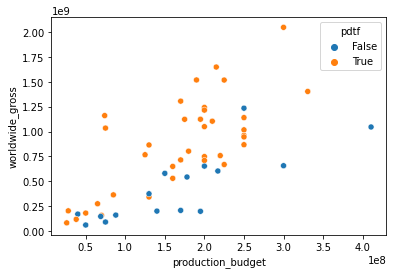

In [314]:
# Flip T/F and build out proper scales with x/y ticks
sns.scatterplot(x='production_budget', y='worldwide_gross', data=dftd2, hue='pdtf')